# Analysis test-trace-isolate

Scenario without vaccination (only isolation of symptomatic cases).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from os.path import join
from os import listdir
import numpy as np
import seaborn as sns

In [2]:
src = '../data/simulation_results/ensembles_TTI_all'

results = pd.DataFrame()
for f in listdir(src):
    tmp = pd.read_csv(join(src, f))
    results = pd.concat([results, tmp])
    
results = results.reset_index(drop=True)
# subtract the index case
results['infected_agents'] = results['infected_agents'] - 1

In [3]:
print('{:1.1f}% of index cases do not lead to an outbreak'\
      .format(len(results[results['infected_agents'] == 0]) / len(results) * 100))

36.3% of index cases do not lead to an outbreak


In [4]:
results['infected_agents'].mean()

5229.545

In [5]:
results['infected_agents'].quantile(0.90)

9128.0

In [6]:
results['infected_agents'].quantile(0.99)

9211.0

In [7]:
results['infected_agents'].max()

9307.0

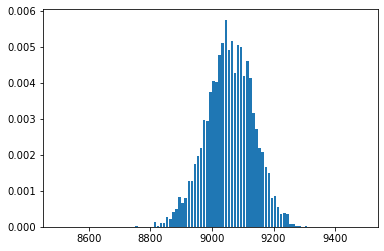

In [8]:
fig, ax = plt.subplots()
ax.hist(results[results['infected_agents'] > 0]['infected_agents'], rwidth=0.8,
        bins=range(8500, 9500, 10), density=True);